In [7]:
pip install -e .

Obtaining file:///Users/alex/Documents/GitHub/PCD_Python/function/pspspline-changepoint
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pspline-changepoint (pyproject.toml) ... done
  Created wheel for pspline-changepoint: filename=pspline_changepoint-0.1.0-0.editable-py3-none-any.whl size=1609 sha256=0b66c76c19b36593980c9006f931489da8e71372198dee2237fad7b3316c7dfd
  Stored in directory: /private/var/folders/ny/yyvvkv811xd7q5kltpmkf8h80000gn/T/pip-ephem-wheel-cache-naiiyhu3/wheels/ab/27/30/b7ede617c4240f884336bf6d7ac4578f413f9edabcc8fe992a
Successfully built pspline-changepoint
  Attempting uninstall: pspline-changepoint
    Found existing installation: pspline-changepoint 0.1.0
    Uninstalling pspline-changepoint-0.1.0:
      Successfully uninstalled pspline-changepoint-0.1.0
Note: you may need to resta

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:804: RuntimeWarning: divide by zero encountered in dot
  B = Vt.T.dot(Dinv).dot(U1.T).dot(Q.T)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:804: RuntimeWarning: overflow encountered in dot
  B = Vt.T.dot(Dinv).dot(U1.T).dot(Q.T)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:804: RuntimeWarning: invalid value encountered in dot
  B = Vt.T.dot(Dinv).dot(U1.T).dot(Q.T)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:805: RuntimeWarning: divide by zero encountered in dot
  coef_new = B.dot(pseudo_data).flatten()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:805: RuntimeWarning: overflow encountered in dot
  coef_new = B.dot(pseudo_data).flatten()
/Library/Frameworks/Python.framework/Versions/3.13/lib/pyth

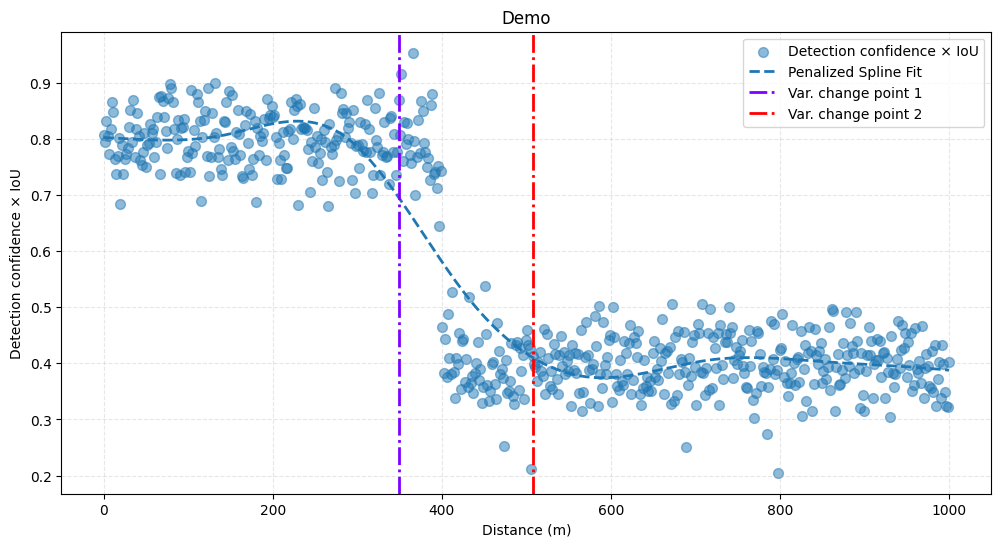

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:804: RuntimeWarning: divide by zero encountered in dot
  B = Vt.T.dot(Dinv).dot(U1.T).dot(Q.T)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:804: RuntimeWarning: overflow encountered in dot
  B = Vt.T.dot(Dinv).dot(U1.T).dot(Q.T)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:804: RuntimeWarning: invalid value encountered in dot
  B = Vt.T.dot(Dinv).dot(U1.T).dot(Q.T)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:805: RuntimeWarning: divide by zero encountered in dot
  coef_new = B.dot(pseudo_data).flatten()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pygam/pygam.py:805: RuntimeWarning: overflow encountered in dot
  coef_new = B.dot(pseudo_data).flatten()
/Library/Frameworks/Python.framework/Versions/3.13/lib/pyth

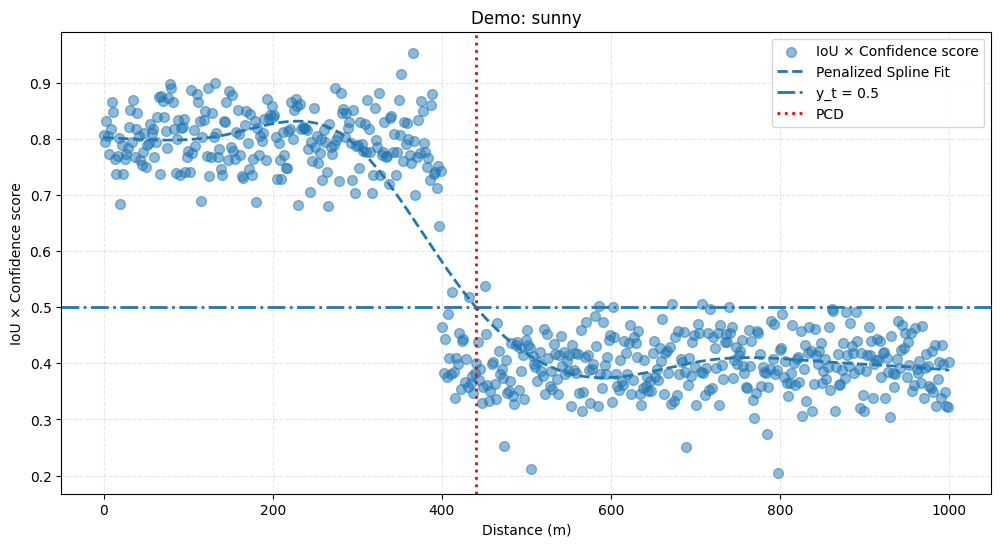

work distance: 440.7345575959933


In [2]:
import numpy as np
from pspline_changepoint import (
  changing_point_p_spline,
  recursive_change_point_detection,
  plot_multiple_change_points, work_distance
)


x = np.linspace(0, 1000, 600)
rng = np.random.default_rng(0)
y = np.where(x < 400, 0.8, 0.4) + 0.05 * rng.standard_normal(len(x))

# 单变点 + 预测
tau, y_pred, value, gam = changing_point_p_spline(x, y, alpha=0.05)

# 多变点递归检测
cps = recursive_change_point_detection(x, y, alpha=0.05, min_segment_size=130)

# 可视化
plot_multiple_change_points(x, y, "Demo", alpha=0.05, show_spline=True)

# 工作距离
wd = work_distance(x, y, cps, "Demo", weather="sunny", prob_threshold=0.5, y_thresh=0.5)
print("work distance:", wd)